### Loading Dataset

In [1]:
# checking text files content
import pandas as pd
df=pd.read_csv('s3Files/data10.txt')
df.to_csv('temp/data10.csv')


In [2]:
df2=pd.read_csv('temp/10.csv')
df2

Unnamed: 0.1  Unnamed: 0  2040  2361    38  Unnamed: 4
0                0         NaN  2031  2365    52         NaN
1                1         NaN  2031  2370    53         NaN
2                2         NaN  2025  2372    54         NaN
3                3         NaN  2023  2379    54         NaN
4                4         NaN  2017  2380    55         NaN
...            ...         ...   ...   ...   ...         ...
9994          9994         NaN  1737  2254   713         NaN
9995          9995         NaN  1735  2246   725         NaN
9996          9996         NaN  1735  2244   732         NaN
9997          9997         NaN  1733  2238   739         NaN
9998          9998         NaN  1733  2234   747         NaN

[9999 rows x 6 columns]

In [3]:
# coverting text files to csv files for easy handling and creating single dataset
import os
import re
path='s3Files/'
for file in os.listdir(path):
    txt=os.path.join(path,file)
    df=pd.read_csv(txt)
#     filename=file[:-4]
    tenp=re.sub('\D', '',filename)
#     print(tenp)
#     break
    filename=tenp+'.csv'
    df.to_csv(os.path.join('temp',filename))
path='temp/'
dir_lst=[]
for file in os.listdir(path):
    txt=os.path.join(path,file)
#     print(txt)
    dir_lst.append(txt)
    
    

NameError: name 'filename' is not defined

In [ ]:
# removing checkpoint folder
dir_lst.pop(0)

In [ ]:
# sorting files 
dir_lst.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
dir_lst

In [ ]:
dftemp=pd.read_csv('temp/314.csv')
dftemp.shape

In [ ]:
# creating single dataset
df=pd.DataFrame()
for file in dir_lst:
#     pd.concat([df,pd.read_csv(file)])/
#     df.append(df,pd.read_csv(file))
    df1=pd.read_csv(file)
    df1.head()
    df=pd.concat([df,df1])
#     break
    
df.head()

Loading data

In [1]:
# loading dataset and basic checks
import pandas as pd
df=pd.read_csv('data.csv')
df.shape

(3170000, 7)

In [5]:
df.sample(5)

Unnamed: 0       0    1     2       3    4    5
1982129        2129  2128.0  NaN  2056  1972.0  389  NaN
1246884        6884  6883.0  NaN  1989  1937.0  765  NaN
1098745        8745  8744.0  NaN  2186  2185.0   84  NaN
1366044        6044  6043.0  NaN  2180  2174.0   90  NaN
896967         6967  6966.0  NaN  1834  2420.0  283  NaN

In [6]:
df.tail(2)

Unnamed: 0       0    1     2       3    4    5
3169998        9998  9997.0  NaN  1998  2179.0  466  NaN
3169999        9999  9998.0  NaN  2002  2184.0  464  NaN

In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170000 entries, 0 to 3169999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  3170000 non-null  int64  
 1   0           3169683 non-null  float64
 2   1           317 non-null      object 
 3   2           3170000 non-null  int64  
 4   3           3170000 non-null  float64
 5   4           3170000 non-null  int64  
 6   5           317 non-null      object 
dtypes: float64(2), int64(3), object(2)
memory usage: 169.3+ MB


our dataset contain 3 columns for 3 phases of motor

In [8]:
df.describe()

Unnamed: 0             0             2             3             4
count  3.170000e+06  3.169683e+06  3.170000e+06  3.170000e+06  3.170000e+06
mean   4.999500e+03  4.999000e+03  1.983090e+03  2.168260e+03  4.345496e+02
std    2.886752e+03  2.886463e+03  1.816999e+02  1.803412e+02  2.729833e+02
min    0.000000e+00  0.000000e+00  1.681000e+03  1.863000e+03  0.000000e+00
25%    2.499750e+03  2.499000e+03  1.787000e+03  1.977000e+03  1.440000e+02
50%    4.999500e+03  4.999000e+03  1.983000e+03  2.169000e+03  4.370000e+02
75%    7.499250e+03  7.499000e+03  2.180000e+03  2.360000e+03  7.250000e+02
max    9.999000e+03  9.998000e+03  2.292000e+03  2.497000e+03  9.070000e+02

In [2]:
df=df[['2','3','4']].rename(columns={'2':'current_1','3':'current_2','4':'current_3'})

##### EDA

In [3]:
eda=df[['current_1','current_2','current_3']]
print(eda.shape)
eda.head()

(3170000, 3)


current_1  current_2  current_3
0       2102     2318.0         97
1       2095     2326.0         94
2       2087     2336.0         78
3       1867     2429.0        283
4       1862     2430.0        297

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

We will check consistency of data

<AxesSubplot:ylabel='current_1'>

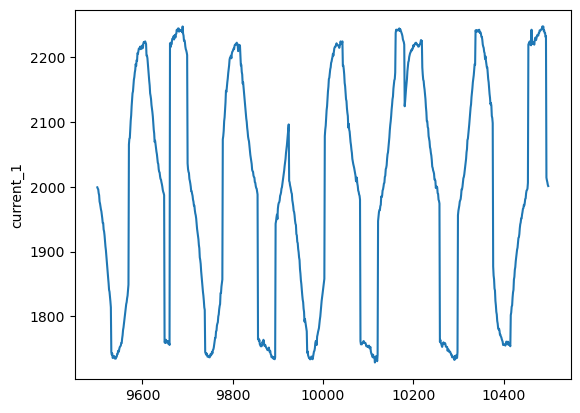

In [15]:
eda1=eda.iloc[9500:10500,:]
sns.lineplot(x=eda1.index.values,y=eda1['current_1'])

<AxesSubplot:ylabel='current_1'>

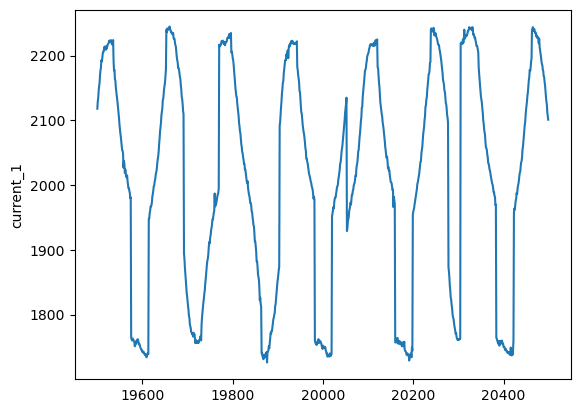

In [16]:
eda1=eda.iloc[19500:20500,:]
sns.lineplot(x=eda1.index.values,y=eda1['current_1'])

Data is countinuous and There are no gap in between two text file reading so we go ahead with data

<AxesSubplot:xlabel='current_1', ylabel='Count'>

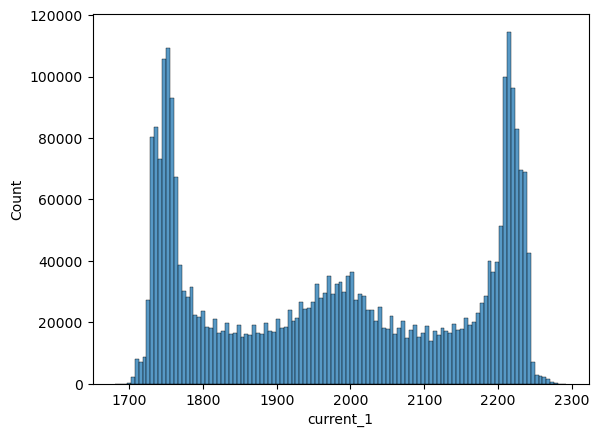

In [17]:
sns.histplot(eda['current_1'])

<AxesSubplot:xlabel='current_2', ylabel='Count'>

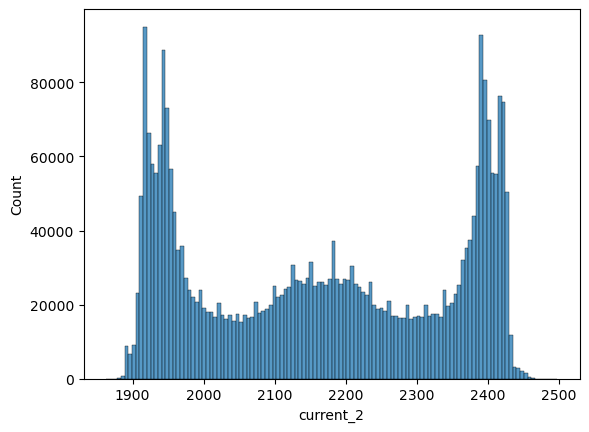

In [18]:
sns.histplot(eda['current_2'])

<AxesSubplot:xlabel='current_3', ylabel='Count'>

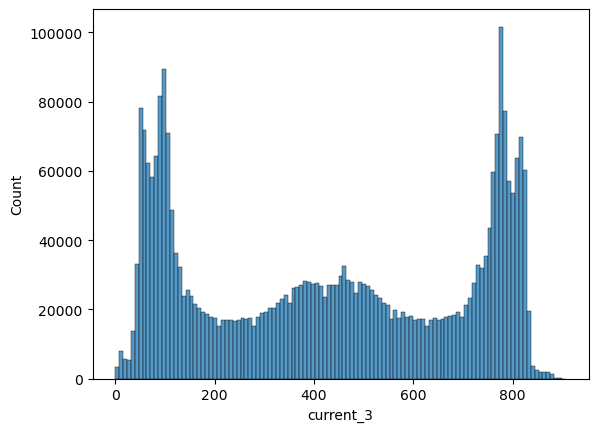

In [19]:
sns.histplot(eda['current_3'])

All three features having multimodal distribution

<AxesSubplot:>

<Figure size 2000x2000 with 0 Axes>

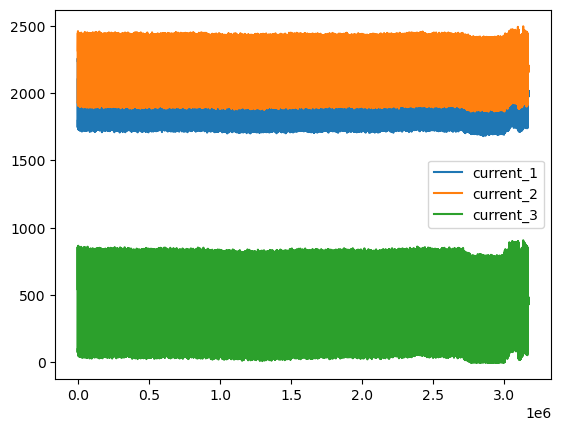

In [20]:
plt.figure(figsize=(20,20))
eda.plot()

Here variations are not clearly visible

<AxesSubplot:ylabel='current_2'>

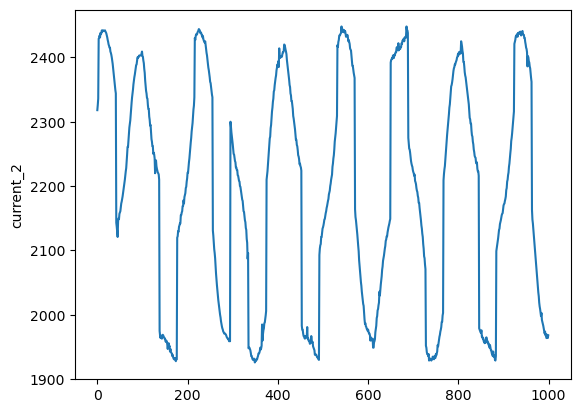

In [22]:
eda1=eda.iloc[:1000,:]
sns.lineplot(x=eda1.index.values,y=eda1['current_2'])

<AxesSubplot:ylabel='current_3'>

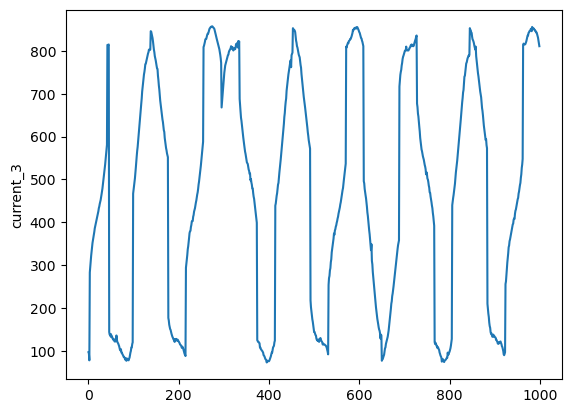

In [23]:
eda1=eda.iloc[:1000,:]
sns.lineplot(x=eda1.index.values,y=eda1['current_3'])

In [ ]:
import plotly.express as px
px.line(df, x=df.index.values, y=['current_1','current_2','current_3'], title='test', template = 'plotly_dark')


###### After taking close look we can see these are not ideal sine wave patterns there are many disturbances. we do not have data and condition parameters where these tests were conducted
###### there could be many reasons for such behavior like fluctuating load on the motor, bearing failure, etc

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_1', ylabel='current_2'>

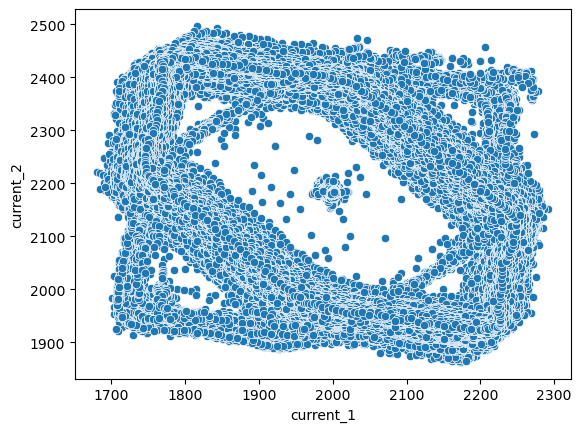

In [25]:
sns.scatterplot(eda['current_1'], eda['current_2'])

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_1', ylabel='current_3'>

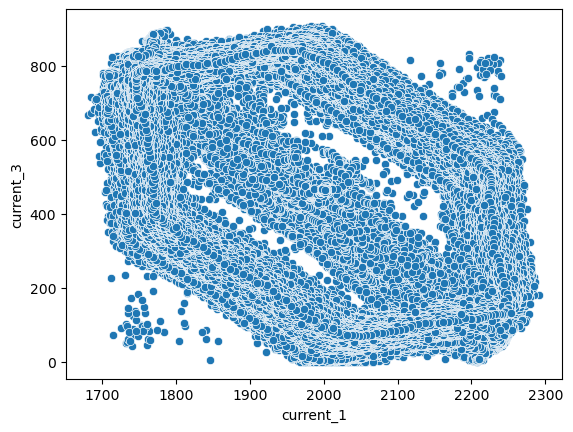

In [26]:
sns.scatterplot(eda['current_1'], eda['current_3'])

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_2', ylabel='current_3'>

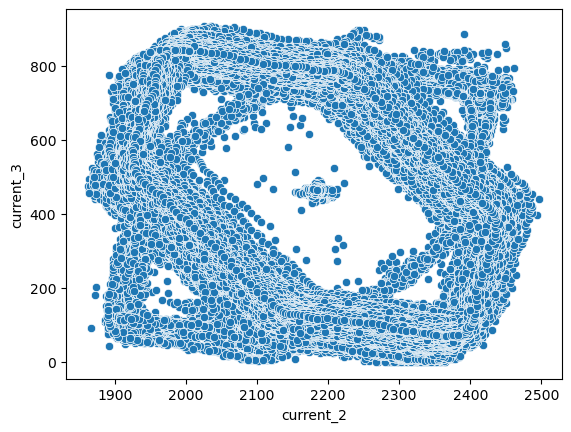

In [27]:
sns.scatterplot(eda['current_2'], eda['current_3'])

Some irregular data point represents fluctutation in reading of current

In [38]:
eda.index.values

array([      0,       1,       2, ..., 3169997, 3169998, 3169999],
      dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce0f392970>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce077c8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce07848c40>,
 'medians': [<matplotlib.lines.Line2D at 0x1ce077d0490>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ce077d0be0>,
 'means': []}

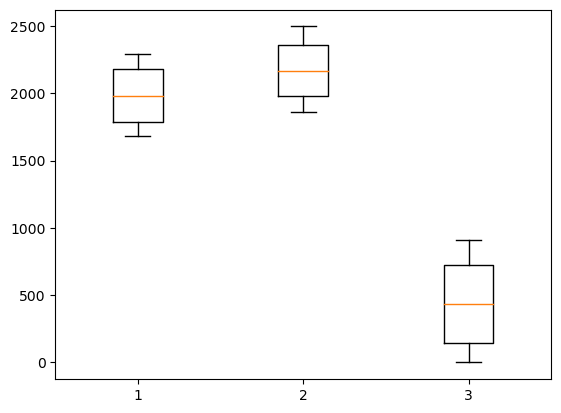

In [200]:
plt.boxplot(eda)

In [ ]:

eda['current_1_r500'] = eda['current_1'].rolling(500).mean()
eda['current_2_r500'] = eda['current_2'].rolling(500).mean()
eda['current_3_r500'] = eda['current_3'].rolling(500).mean()

# data['MA336'] = data['current_2'].rolling(336).mean()
# plot 
import plotly.express as px
fig = px.line(eda, x=eda.index.values, y=['current_1', 'current_1_r500','current_2', 'current_2_r500','current_3', 'current_3_r500'], title='test', template = 'plotly_dark')
fig.show()

## Approach 1 

In [204]:
x=eda
y=eda[-620000:]
x.shape,y.shape

((3170000, 3), (620000, 3))

In [13]:
from sklearn.neighbors import NearestNeighbors

In [14]:
knn=NearestNeighbors(n_neighbors=3)
knn.fit(x)

NameError: name 'x' is not defined

In [ ]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = knn.kneighbors(x)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [ ]:
# plt.figure(figsize=(20,20))
# plt.plot(distances.mean(axis =1))

In [ ]:
import numpy as np
outlier_index = np.where(distances.mean(axis = 1) > 40)
outlier_index

In [226]:
outlier_values = eda.iloc[outlier_index]
outlier_values

2       3    4
9150     1978  2282.0  657
48059    2071  2096.0  169
187993   1893  2234.0   96
258042   1771  2058.0  239
259320   1783  2259.0   81
417721   2149  2221.0  315
470287   2160  2121.0  780
737997   1937  2133.0  119
1288767  1840  2239.0   62
1327659  1862  2053.0  491
1350318  1738  2190.0  468
1459169  1928  2163.0   86
1519593  1729  2018.0  307
1687938  1937  1975.0  185
1868235  2092  2171.0  779
2268271  2071  2318.0  483
2408957  1834  1988.0  395
2449168  1894  2068.0  235
2768359  1989  2074.0  121
2798375  2003  2000.0  258
2958150  1922  2271.0   26
2969337  1846  2333.0    5
3049535  1849  2144.0  580
3099574  2008  2389.0  816
3161755  2245  2201.0  446

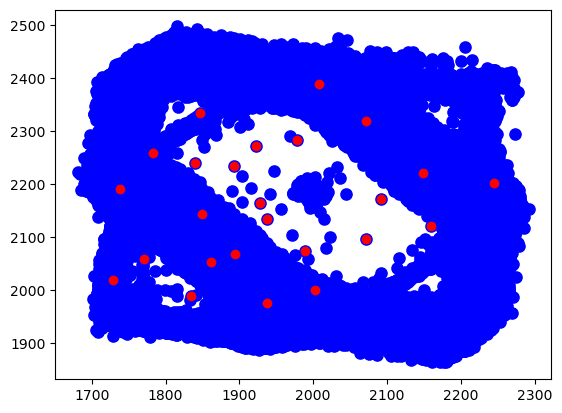

In [227]:
# plot data
plt.scatter(x['2'], x['3'], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["2"], outlier_values["3"], color = "r")

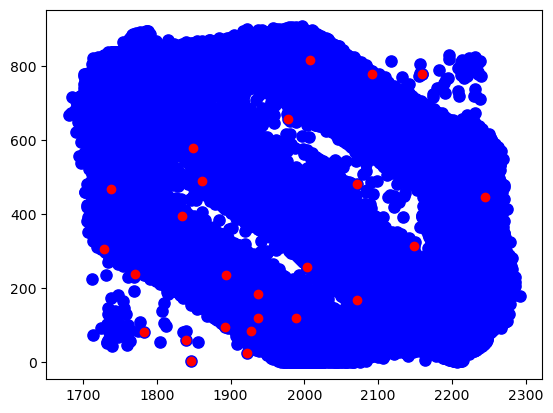

In [228]:
plt.scatter(x['2'], x['4'], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["2"], outlier_values["4"], color = "r")

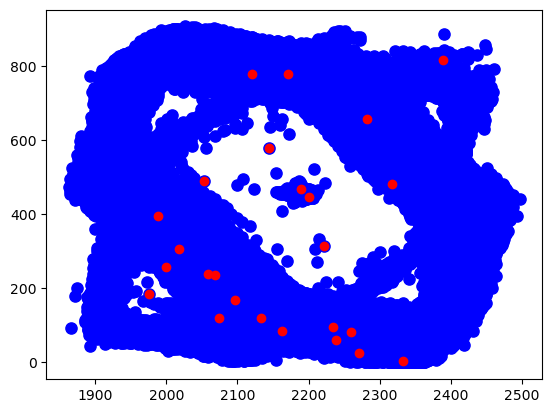

     -------------------------------------- 320.2/320.2 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with stat

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [1911 lines of output]
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  C:\Users\rohan\AppData\Local\Temp\pip-build-env-jtk7f8wn\overlay\Lib\site-packages\setuptools\_distutils\_msvccompiler.py:535: UserWarning: Fallback spawn triggered. Please update distutils monkeypatch.
    warnings.warn("Fallback spawn triggered. Please update distutils monkeypatch.")
  G:\C2\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.29.30133\bin\HostX86\x64\cl.exe /c /nologo /O2 /W3 /GL /DNDEBUG /MD -IG:\C2\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.29.30133\ATLMFC\include -IG:\C2\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.29.30133\include -IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\ucrt -IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\shared -IC:\Program Files (x86)\Windows Kits\10\inc

In [229]:
plt.scatter(x['3'], x['4'], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["3"], outlier_values["4"], color = "r")

### NearestNeighbors with Scaling

In [215]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [216]:
ss=MinMaxScaler()
x_scaled=ss.fit_transform(x)

In [217]:
x_scaled

array([[0.68903437, 0.71766562, 0.10694598],
       [0.67757774, 0.73028391, 0.10363837],
       [0.66448445, 0.74605678, 0.08599779],
       ...,
       [0.52209493, 0.5       , 0.51267916],
       [0.5188216 , 0.49842271, 0.5137817 ],
       [0.52536825, 0.50630915, 0.51157663]])

In [218]:
x_scaled.shape

(3170000, 3)

In [219]:
temp=pd.DataFrame(x_scaled,columns=['2','3','4'])
temp.head()

2         3         4
0  0.689034  0.717666  0.106946
1  0.677578  0.730284  0.103638
2  0.664484  0.746057  0.085998
3  0.304419  0.892744  0.312018
4  0.296236  0.894322  0.327453

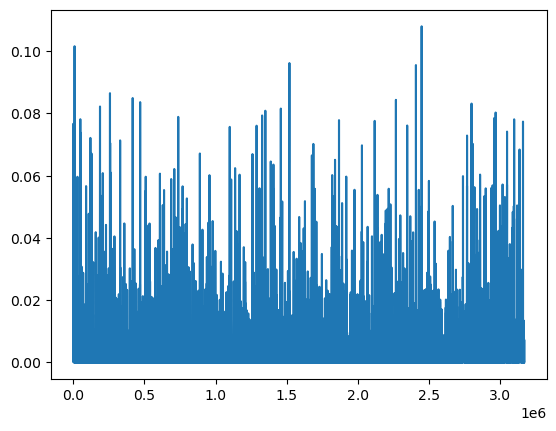

In [234]:
knn=NearestNeighbors(n_neighbors=4)
knn.fit(temp)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = knn.kneighbors(temp)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [235]:
outlier_index = np.where(distances.mean(axis = 1) > 0.06)
outlier_index
outlier_values = temp.iloc[outlier_index]

In [236]:
outlier_values

2         3         4
46       0.284779  0.444795  0.158765
9150     0.486088  0.660883  0.724366
48059    0.638298  0.367508  0.186329
49563    0.612111  0.760252  0.867696
120384   0.798691  0.544164  0.576626
128500   0.152209  0.488959  0.679162
187993   0.346972  0.585174  0.105843
207561   0.842881  0.504732  0.916207
258042   0.147300  0.307571  0.263506
259320   0.166939  0.624606  0.089305
260226   0.882160  0.458991  0.564498
329500   0.474632  0.378549  0.871003
417721   0.765957  0.564669  0.347299
470287   0.783961  0.406940  0.859978
609271   0.355155  0.253943  0.104741
710213   0.867430  0.471609  0.452040
737997   0.418985  0.425868  0.131202
889978   0.911620  0.766562  0.571114
957523   0.425532  0.223975  0.362734
1099954  0.325696  0.271293  0.130099
1137806  0.230769  0.373817  0.528115
1169231  0.900164  0.384858  0.743109
1260010  0.260229  0.487382  0.093716
1288767  0.260229  0.593060  0.068357
1327659  0.296236  0.299685  0.541345
1350318  0.093290  0.515773  0.515987
1388461  0.211129  0.397476  0.116869
1407117  0.556465  0.563091  0.813671
1459169  0.404255  0.473186  0.094818
1519593  0.078560  0.244479  0.338479
1677511  0.286416  0.731861  0.061742
1687938  0.418985  0.176656  0.203969
1820316  0.353519  0.847003  0.901874
1840232  0.117840  0.123028  0.472988
1868235  0.672668  0.485804  0.858875
2029553  0.545008  0.425868  0.109151
2119002  0.638298  0.708202  0.864388
2268271  0.638298  0.717666  0.532525
2347627  0.176759  0.460568  0.337376
2408957  0.250409  0.197161  0.435502
2449168  0.348609  0.323344  0.259096
2768359  0.504092  0.332808  0.133407
2798375  0.527005  0.216088  0.284454
2800026  0.081833  0.239748  0.259096
2808679  0.651391  0.566246  0.745314
2859974  0.800327  0.449527  0.757442
2957895  0.806874  0.518927  0.790518
2958150  0.394435  0.643533  0.028666
2969337  0.270049  0.741325  0.005513
3049535  0.274959  0.443218  0.639471
3099574  0.535188  0.829653  0.899669
3137391  0.661211  0.167192  0.125689
3161755  0.923077  0.533123  0.491731

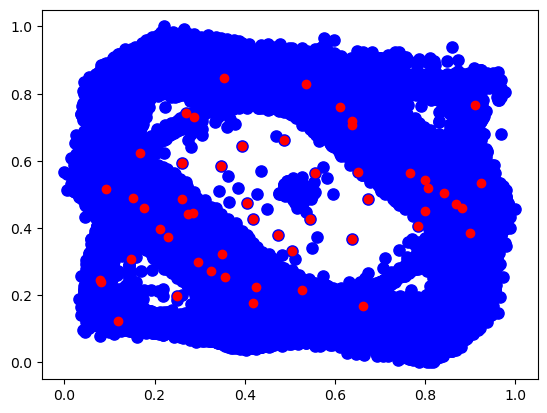

In [237]:
plt.scatter(temp['2'], temp['3'], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["2"], outlier_values["3"], color = "r")

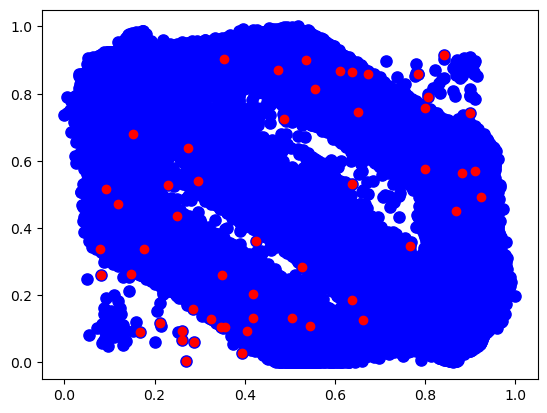

In [238]:
plt.scatter(temp['2'], temp['4'], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["2"], outlier_values["4"], color = "r")

# Isolation forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Read the data
data = pd.read_csv("data.csv")
data=data[['2','3','4']].rename(columns={'2':'current_1','3':'current_2','4':'current_3'})

# Define window size and sliding step
window_size = 500
step = 250

# Define statistical features to be calculated for each window
features = ['mean', 'std', 'min', 'max']

# Preprocess the data
X = []
for i in range(0, len(data), step): #-window_size from len(data)
    window = data.iloc[i:i+window_size]

    x = []
    for col in ['current_1', 'current_2', 'current_3']:
        for f in features:
            x.append(getattr(window[col], f)())
    X.append(x)
X = np.array(X)


In [49]:
X.shape

(12680, 12)

In [31]:
from sklearn.cluster import KMeans
# Feature selection
# ...

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# APPROACH 1 Train the model
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.005, random_state=0)
clf.fit(X_scaled)

# APPROACH 2 Perform clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)
cluster_centers = kmeans.cluster_centers_




In [32]:
# APPROACH 2 Detect anomalies
distances = []
for i in range(len(X)):
    distances.append(np.linalg.norm(X_scaled[i] - cluster_centers[labels[i]]))
threshold = np.mean(distances) + 3*np.std(distances)
anomalies = np.where(np.array(distances) > threshold)[0]
# Define condition indicators
condition_indicators = []
for i in range(0, len(data)-window_size, step):
    ci = len(np.where((anomalies >= i) & (anomalies < i+window_size))[0]) / window_size
    condition_indicators.append(ci)

In [33]:
len(condition_indicators)

3160

In [6]:
# APPROACH 1
if_scores = clf.decision_function(X)
if_anomalies=clf.predict(X_scaled)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])

In [13]:
if_anomalies

0       0
1       0
2       0
3       0
4       0
       ..
3155    1
3156    1
3157    1
3158    1
3159    1
Length: 3160, dtype: int32

In [15]:
# APPROACH 1
# if_anomalies2=data[if_anomalies==1]
# plt.figure(figsize=(12,8))
# plt.hist(if_anomalies2)
# plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous')

In [16]:
# APPROACH 1
# cmap=np.array(['white','red'])
# plt.scatter(data.iloc[:,0],data.iloc[:,1],c='white',s=20,edgecolor='k')
# plt.scatter(if_anomalies2.iloc[:,0],if_anomalies2.iloc[:,1],c='red')
# plt.xlabel('Income')
# plt.ylabel('Spend_Score')
# plt.title('Isolation Forests - Anomalies')

In [6]:
# APPROACH 1
# Evaluate the model
# ...

# Detect anomalies and generate alerts
anoms=[]
for i in range(0, len(data)-window_size, step):
    window = data.iloc[i:i+window_size]
    x = []
    for col in ['current_1', 'current_2', 'current_3']:
        for f in features:
            x.append(getattr(window[col], f)())
    x_scaled = scaler.transform(np.array(x).reshape(1, -1))
    if clf.predict(x_scaled) == -1:
        print('Please check Motor')
        anoms.append(scaler.inverse_transform(x_scaled))
        
#         generate_alert()



Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check Motor
Please check

In [7]:
anoms

[array([[1970.2191    ,  180.58023097, 1711.        , 2237.        ,
         2154.0671    ,  181.76278103, 1873.        , 2436.        ,
          411.3206    ,  269.43214764,    6.        ,  813.        ]]),
 array([[1968.7955    ,  180.38278819, 1707.        , 2237.        ,
         2153.9756    ,  181.71275177, 1873.        , 2436.        ,
          412.6661    ,  269.70770667,    6.        ,  813.        ]]),
 array([[1968.7883    ,  180.29487377, 1707.        , 2237.        ,
         2154.8393    ,  181.92343964, 1873.        , 2436.        ,
          410.214     ,  269.58876018,    6.        ,  813.        ]]),
 array([[1969.4206    ,  180.54128728, 1707.        , 2228.        ,
         2153.3719    ,  181.78542567, 1873.        , 2436.        ,
          410.6402    ,  269.40736474,    3.        ,  813.        ]]),
 array([[1967.9228    ,  180.61041457, 1707.        , 2228.        ,
         2153.8206    ,  181.59586593, 1873.        , 2422.        ,
          411.4508    

In [17]:
X_scaled.shape

(3160, 12)

In [22]:
# APPROACH 1
# Define condition indicators
condition_indicators = []
for i in range(0, len(data)-window_size, step):
    print(i)
    try:
#         ci = np.sum(clf.predict(X_scaled[i:i+window_size]) == -1) / window_size
        ci = np.sum(clf.predict(X_scaled[i].reshape(-1, 1)) == -1)
        condition_indicators.append(ci)
    except Exception as e:
         print(e)

0
X has 1 features, but IsolationForest is expecting 12 features as input.
1000
X has 1 features, but IsolationForest is expecting 12 features as input.
2000
X has 1 features, but IsolationForest is expecting 12 features as input.
3000
X has 1 features, but IsolationForest is expecting 12 features as input.
4000
index 4000 is out of bounds for axis 0 with size 3160
5000
index 5000 is out of bounds for axis 0 with size 3160
6000
index 6000 is out of bounds for axis 0 with size 3160
7000
index 7000 is out of bounds for axis 0 with size 3160
8000
index 8000 is out of bounds for axis 0 with size 3160
9000
index 9000 is out of bounds for axis 0 with size 3160
10000
index 10000 is out of bounds for axis 0 with size 3160
11000
index 11000 is out of bounds for axis 0 with size 3160
12000
index 12000 is out of bounds for axis 0 with size 3160
13000
index 13000 is out of bounds for axis 0 with size 3160
14000
index 14000 is out of bounds for axis 0 with size 3160
15000
index 15000 is out of boun

396000
index 396000 is out of bounds for axis 0 with size 3160
397000
index 397000 is out of bounds for axis 0 with size 3160
398000
index 398000 is out of bounds for axis 0 with size 3160
399000
index 399000 is out of bounds for axis 0 with size 3160
400000
index 400000 is out of bounds for axis 0 with size 3160
401000
index 401000 is out of bounds for axis 0 with size 3160
402000
index 402000 is out of bounds for axis 0 with size 3160
403000
index 403000 is out of bounds for axis 0 with size 3160
404000
index 404000 is out of bounds for axis 0 with size 3160
405000
index 405000 is out of bounds for axis 0 with size 3160
406000
index 406000 is out of bounds for axis 0 with size 3160
407000
index 407000 is out of bounds for axis 0 with size 3160
408000
index 408000 is out of bounds for axis 0 with size 3160
409000
index 409000 is out of bounds for axis 0 with size 3160
410000
index 410000 is out of bounds for axis 0 with size 3160
411000
index 411000 is out of bounds for axis 0 with si

# KDF


In [ ]:
from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

data = pd.read_csv("data.csv")
data=data[['2','3','4']].rename(columns={'2':'current_1','3':'current_2','4':'current_3'})

# plt.plot(data.index.values, data)
# plt.show() 
import plotly.express as px
px.line(data, x=data.index.values, y=['current_1','current_2','current_3'], title='test', template = 'plotly_dark')


In [ ]:
kern_dens = KernelDensity()
kern_dens.fit(data)

scores = kern_dens.score_samples(X)
threshold = quantile(scores, .02)
print(threshold)

idx = where(scores <= threshold)
values = X[idx]
# plt.plot(data.index.values, data)
px.line(data, x=data.index.values, y=['current_1','current_2','current_3'], title='test', template = 'plotly_dark')
px.sca
plt.scatter(idx,values, color='r')
plt.show()